In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
from matplotlib import pyplot as plt
from src.models.HmmEam import model, unconstrain_parameters, constrain_parameters, configurator

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 400, 3)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
df = model(10_000)

In [3]:
rts = df['sim_data'][...,0]

In [4]:
conf_df = configurator(df)

In [5]:
np.isnan(df['prior_draws']).any()

False

In [6]:
np.isnan(conf_df['posterior_inputs']['parameters']).any()

False

[0.80048983 0.79906574 0.53042192 2.03642639 5.49391782 2.49770531
 5.014647   0.19873801]


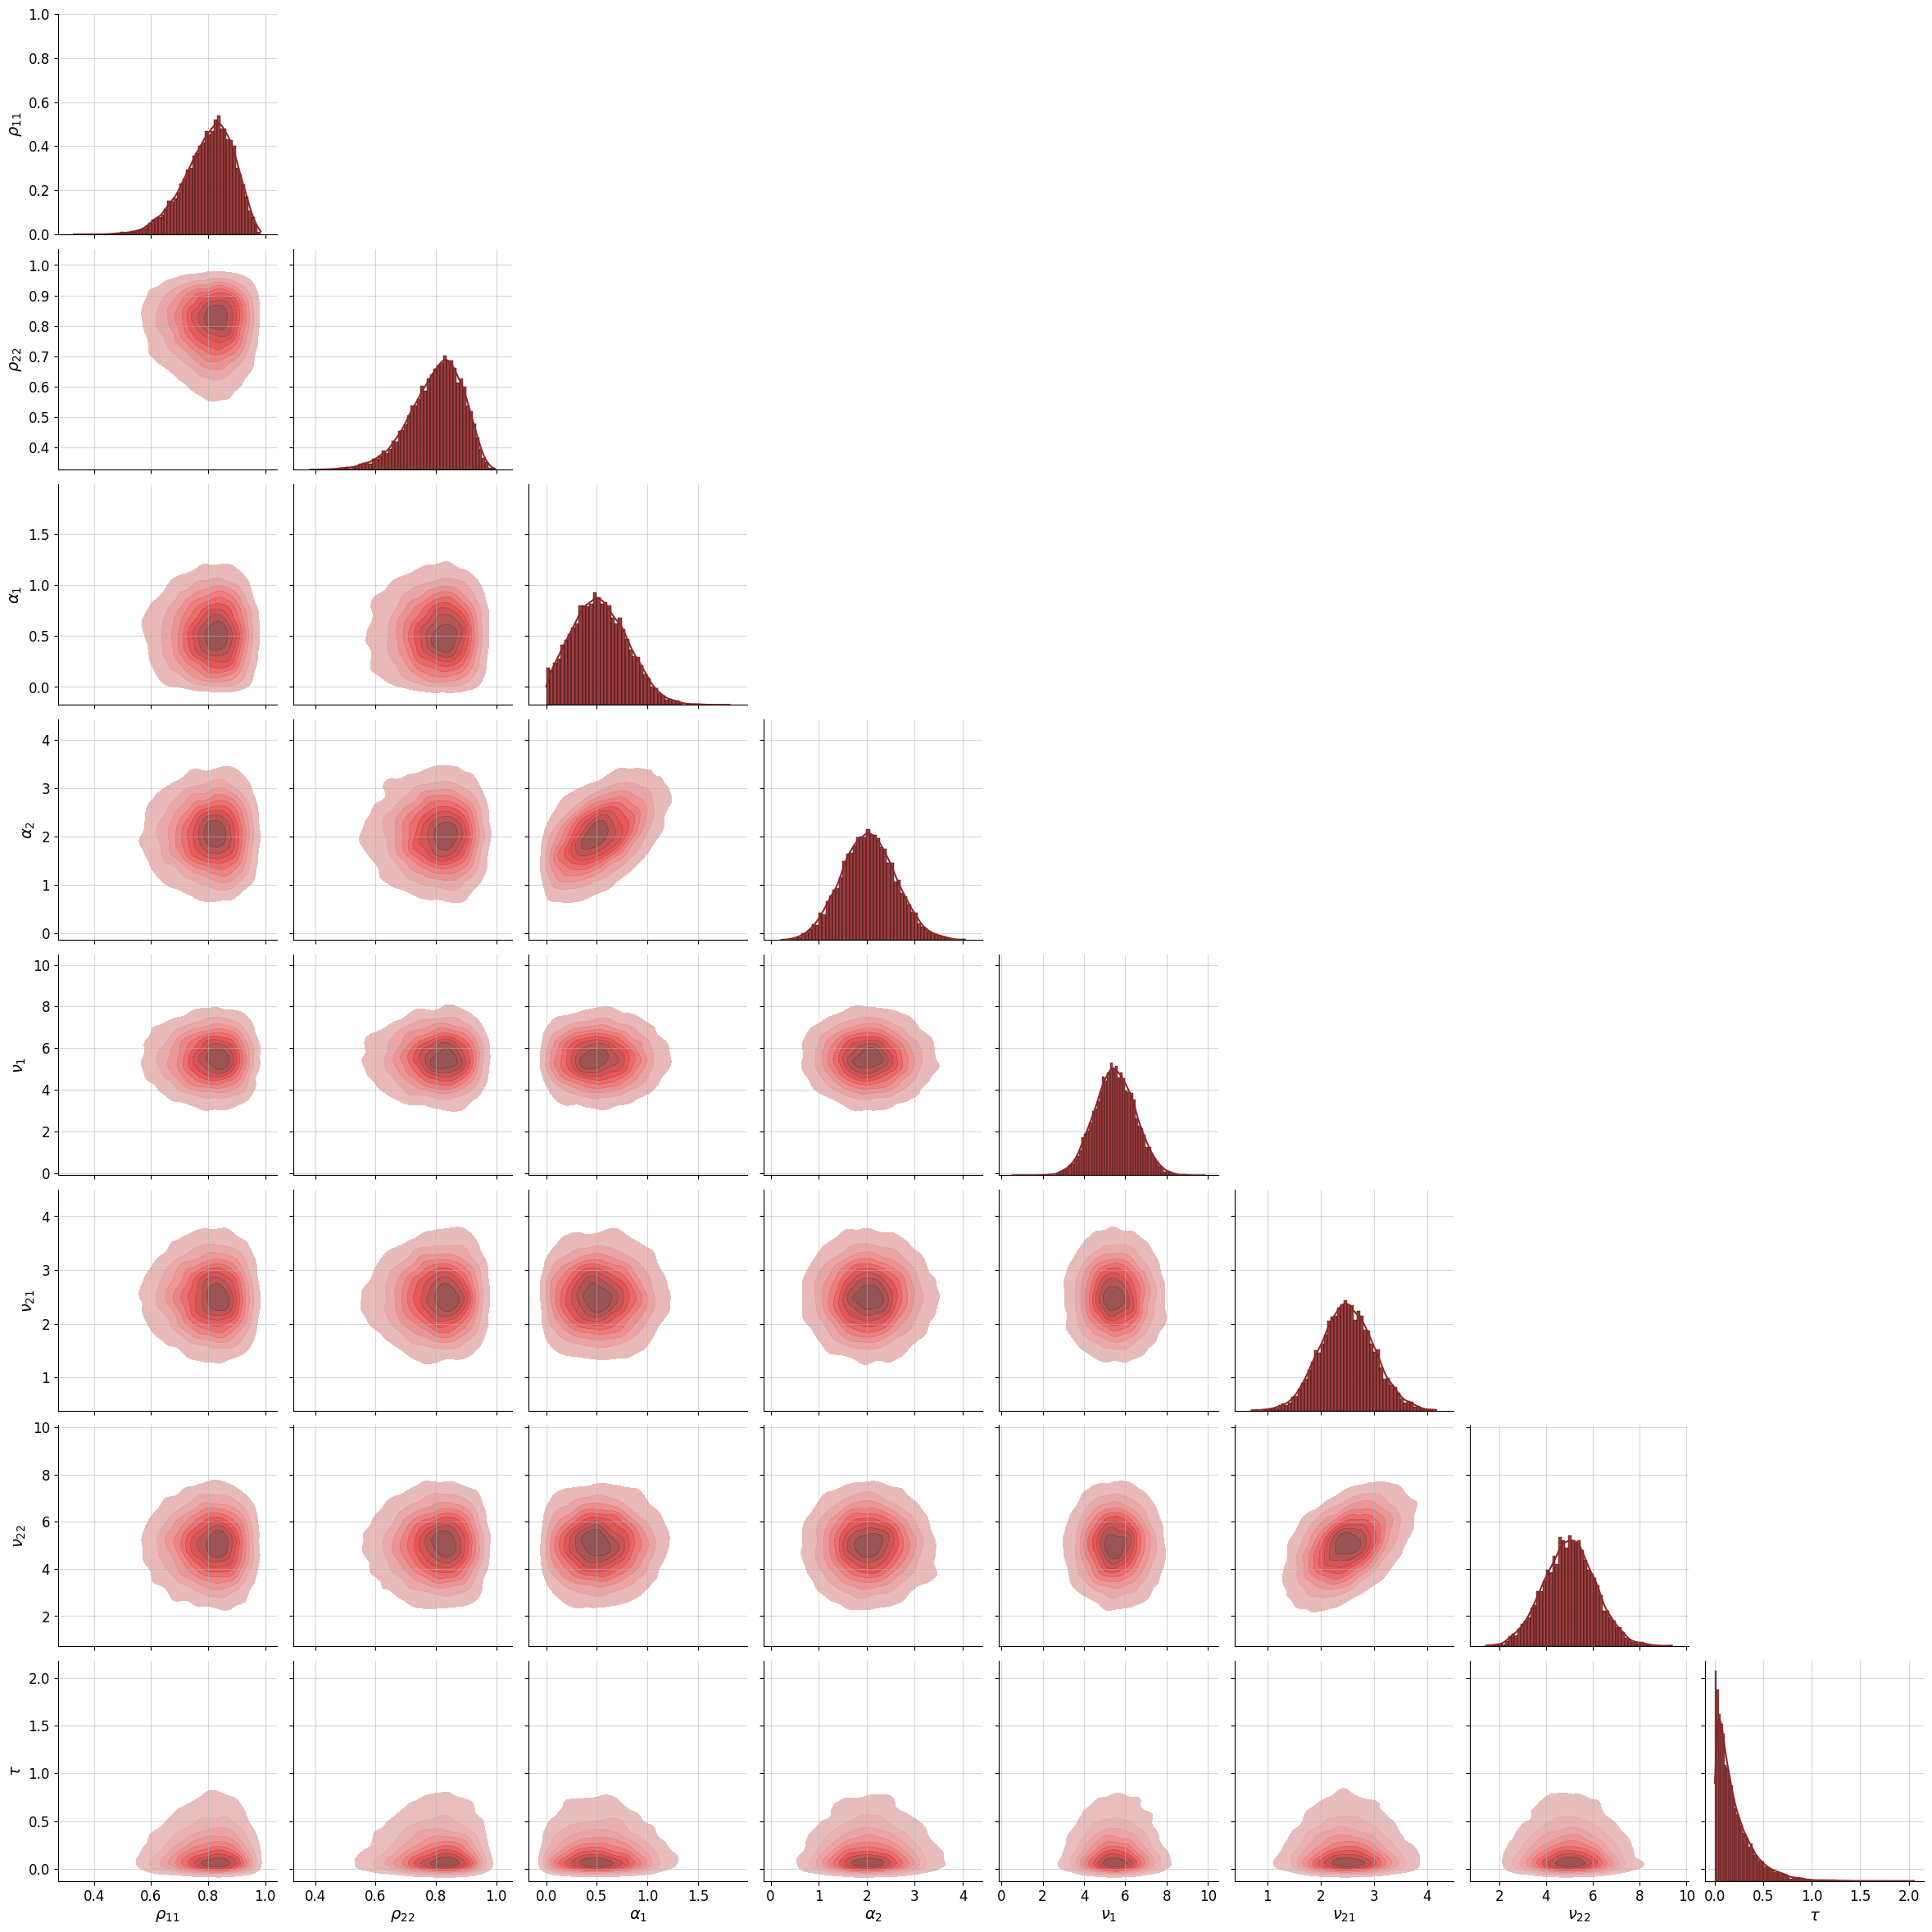

In [7]:
par = df['prior_draws']
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["constrained"])

[ 1.48840517  1.47740791 -0.83450966  0.34276334  1.68627747  0.89425566
  0.82071723  1.87542957]


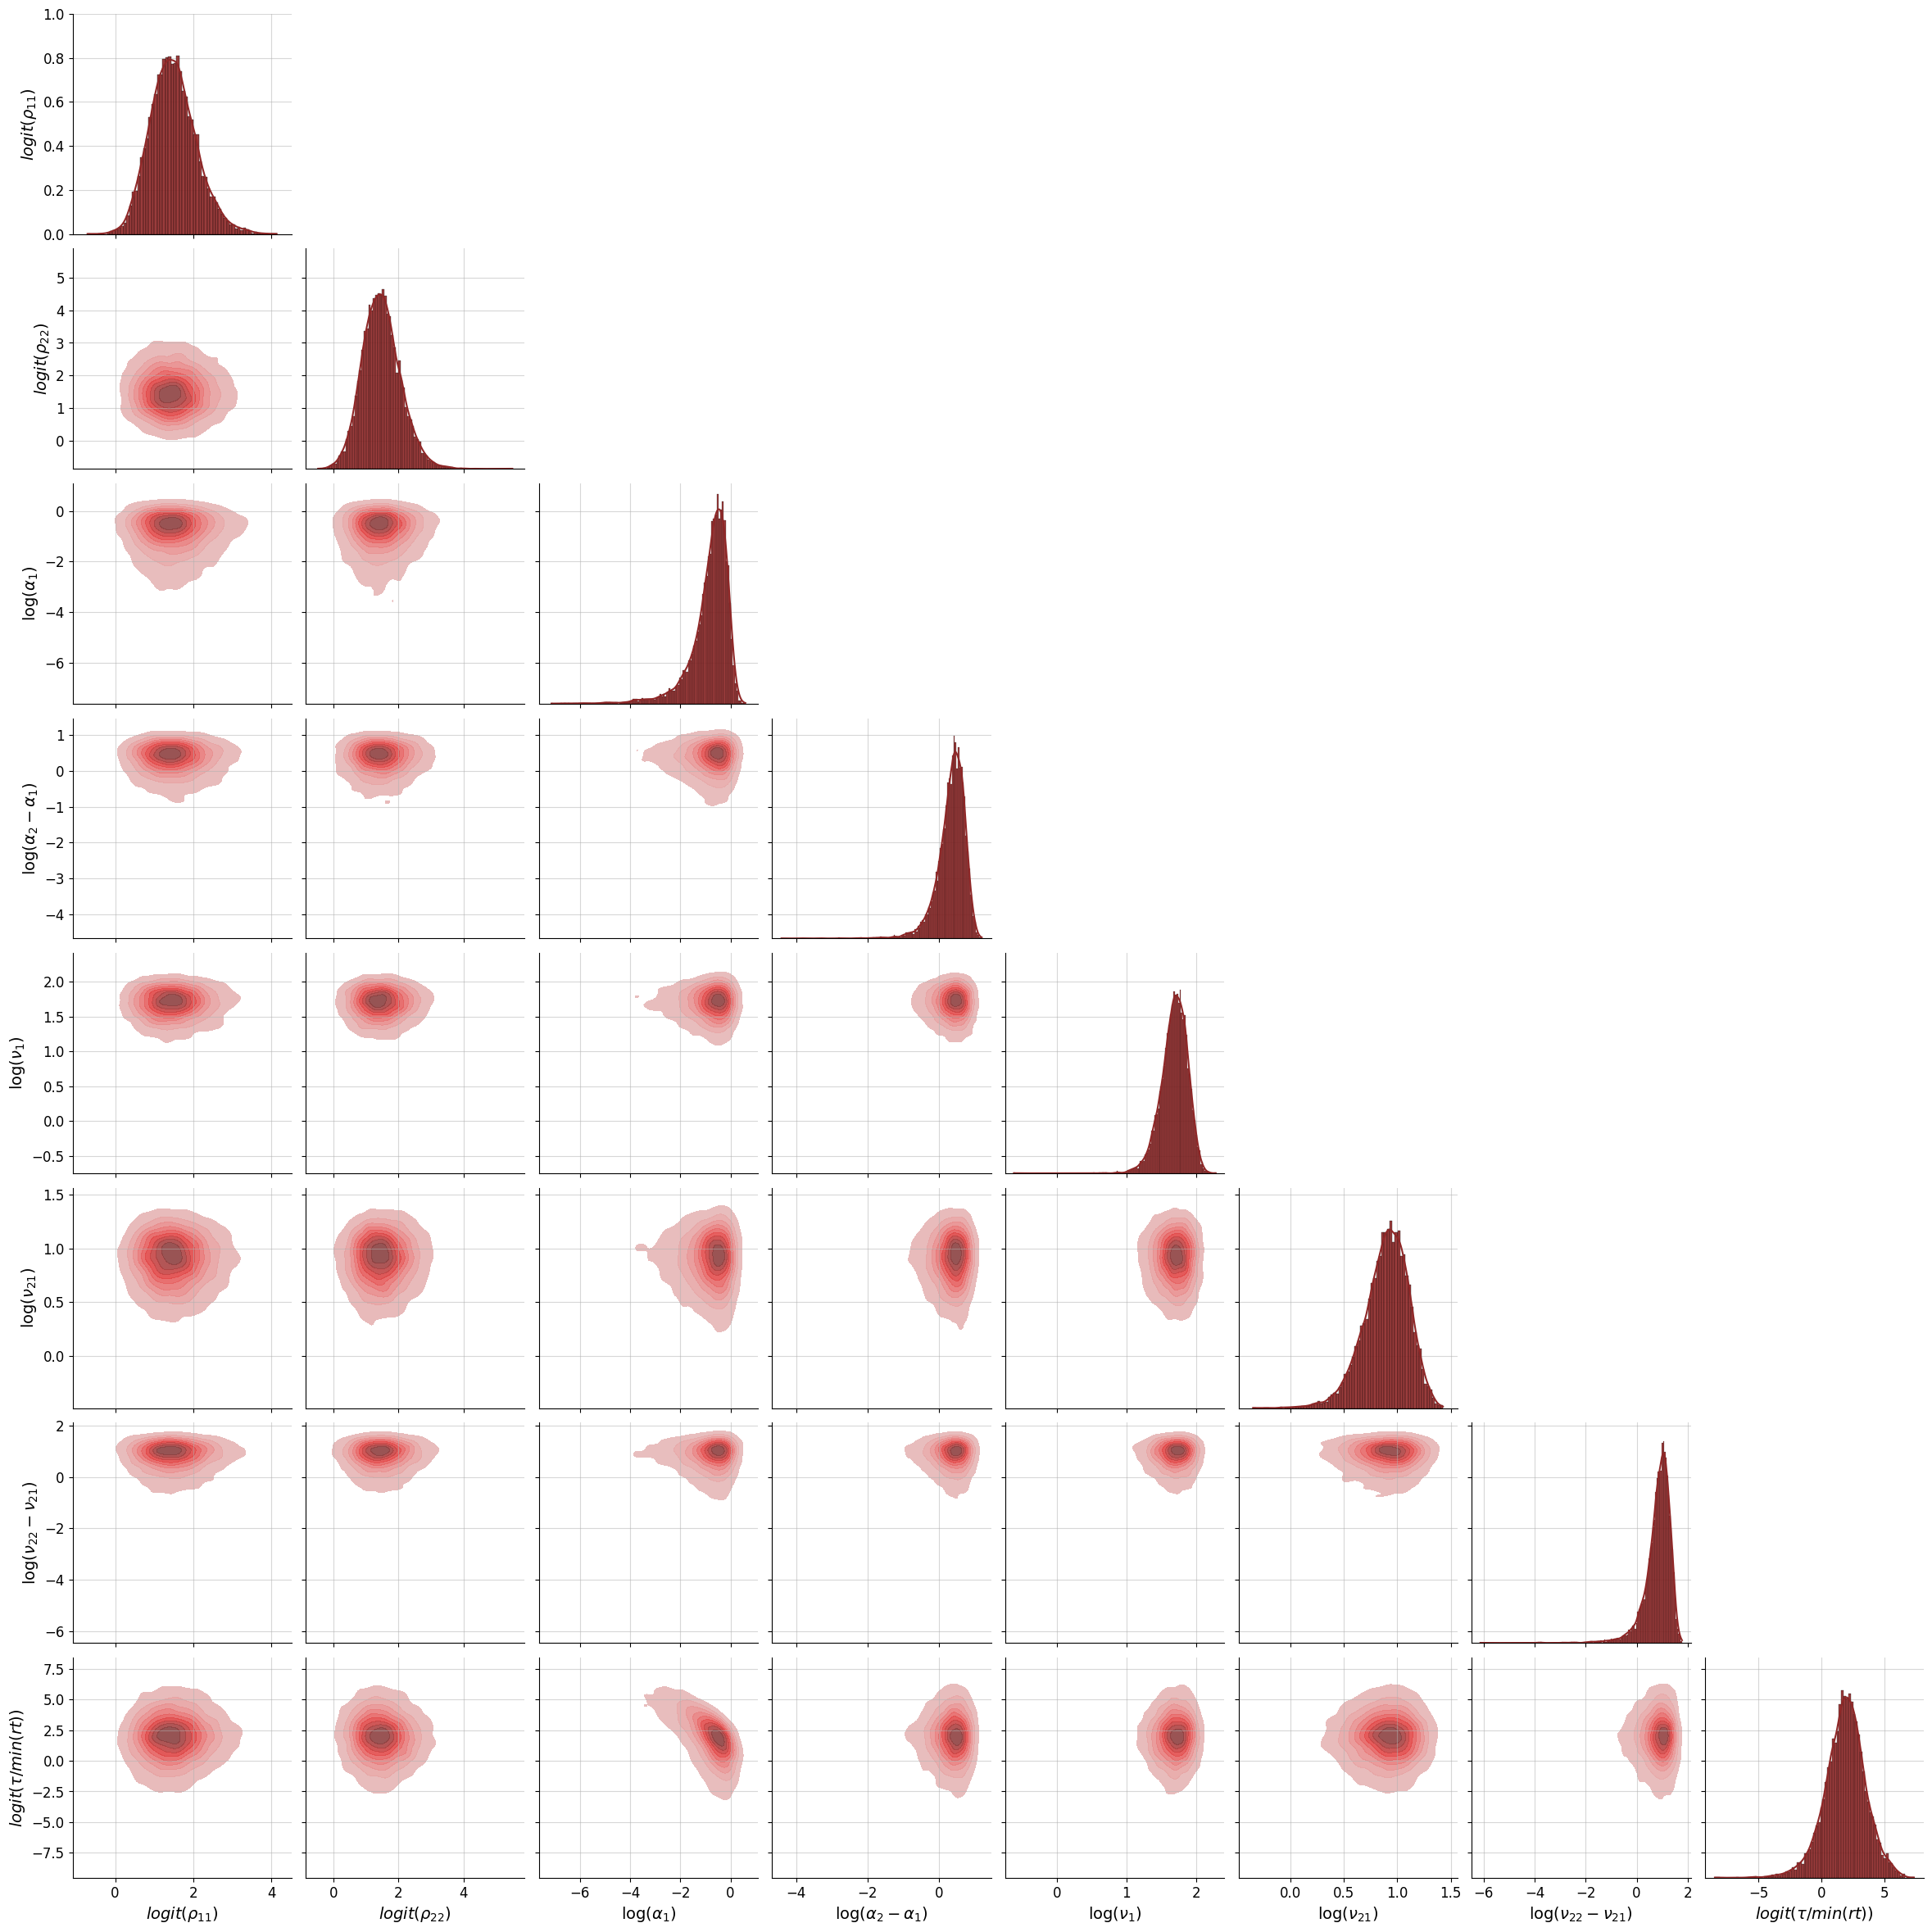

In [8]:
par = unconstrain_parameters(par, rts)
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["unconstrained"])

[0.80048983 0.79906574 0.53042192 2.03642639 5.49391782 2.49770531
 5.014647   0.19873801]


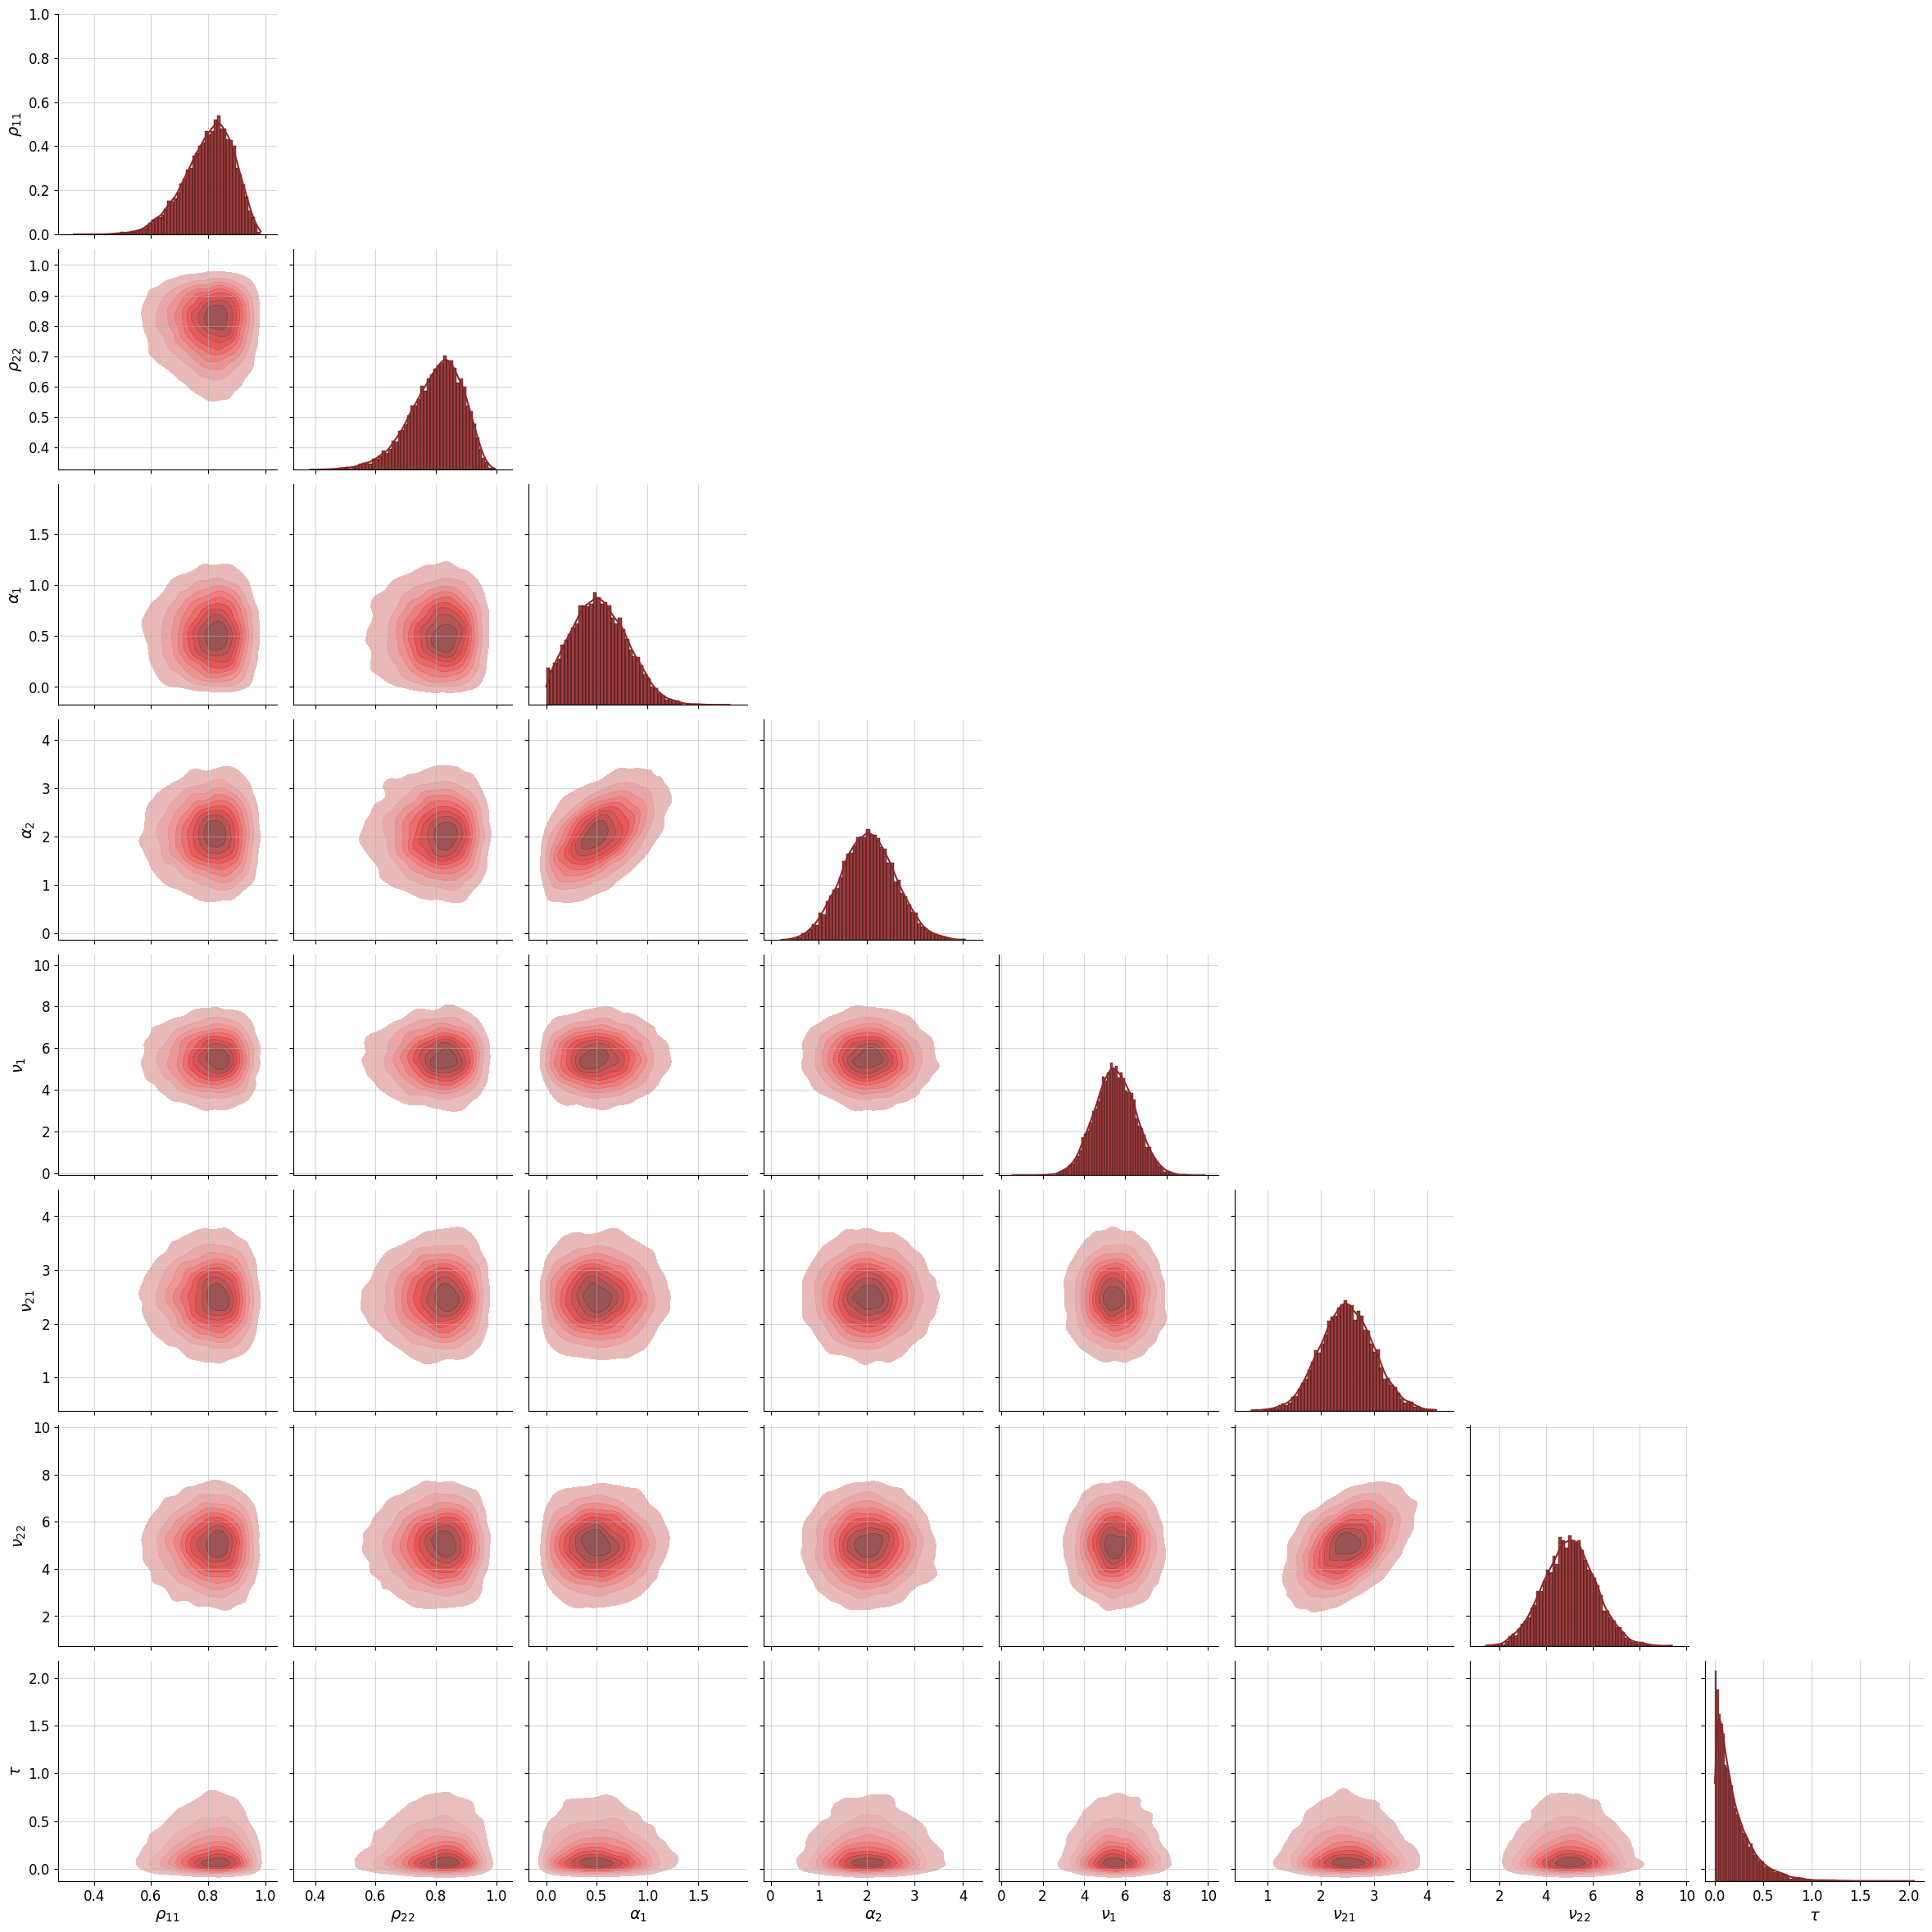

In [9]:
par = constrain_parameters(par, rts)
print(np.mean(par, axis=0))
f=bf.diagnostics.plot_posterior_2d(par, param_names=model.param_names["constrained"])

In [10]:
rts = df['sim_data'][...,0]
rts

array([[0.47838172, 0.47572373, 0.47666532, ..., 0.937288  , 0.97340879,
        0.91563452],
       [0.64910401, 0.79343194, 0.8101472 , ..., 0.5394908 , 0.59727949,
        0.84213219],
       [0.8817269 , 0.471989  , 1.15672395, ..., 0.44330899, 1.05982976,
        0.67727494],
       ...,
       [0.39512462, 0.59585497, 0.58676906, ..., 0.54099237, 0.7065765 ,
        0.31942217],
       [0.4362199 , 0.443777  , 0.21731169, ..., 0.45827031, 0.55082015,
        0.52114925],
       [0.07021085, 0.07213108, 0.04799371, ..., 0.06924895, 0.30587947,
        0.37950021]])

In [11]:
responses = df['sim_data'][...,1]
responses

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 1., 1.]])

In [12]:
states = df['sim_data'][...,2]
states

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

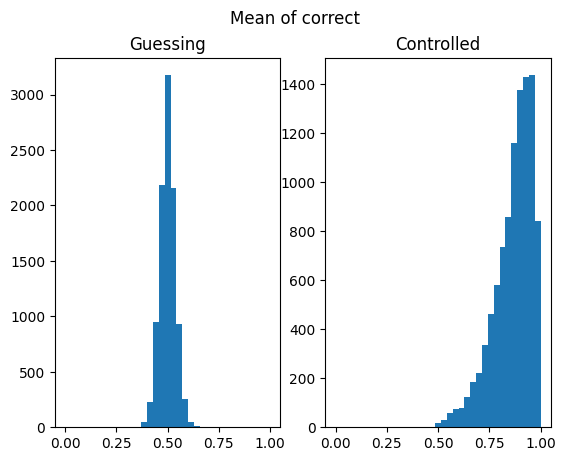

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1)

for i, state in enumerate(['Guessing', 'Controlled']):
    f=axs[i].hist(np.nanmean(np.where(states==i, responses, np.nan), axis=1), bins=np.linspace(0, 1, 36))
    f=axs[i].set_title(state)
f=fig.suptitle("Mean of correct")

/var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/ipykernel_97255/3755053843.py:8: RuntimeWarning: Mean of empty slice
  f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)


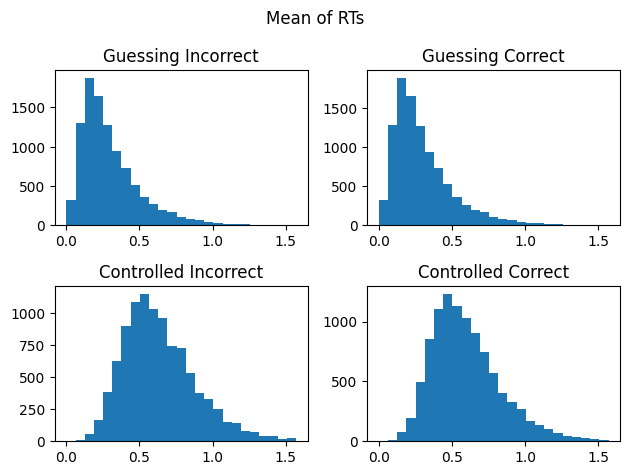

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.mean(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("Mean of RTs")
f=fig.tight_layout()

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


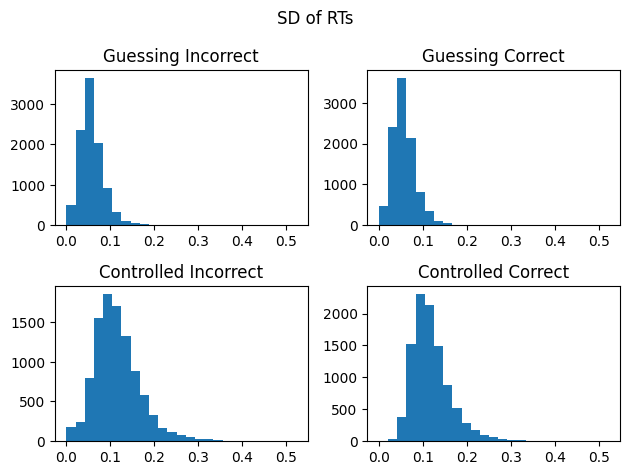

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.std(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanstd(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("SD of RTs")
f=fig.tight_layout()